In [17]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import nmc_verification.nmc_vf_base as nvb
import nmc_verification.nmc_vf_method as nvm
import nmc_verification.nmc_vf_product as nvp
import numpy as np
import datetime
import copy
import matplotlib.pyplot as plt
import time
import pandas as pd
import math
import matplotlib as mpl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#设置数据路径的通配格式
dir_ob = r"H:\task\paper\word\w14-DTS\data\ob\YYMMDDHH.000"
dir_prod = r"L:\prod\pre\YYYYMMDDHH.TTT.nc"
station = nvb.read_station(nvb.station_国家站)

In [3]:
ob_sta_all = None
time0 = datetime.datetime(2019,5,1,8,0)
time_end = datetime.datetime(2019,12,1,8,0)
while time0 < time_end:
    path = nvb.get_path(dir_ob,time0)
    sta = nvb.read_stadata_from_micaps3(path,station = station,time = time0,dtime = 0,level = 0,data_name = "ob")
    ob_sta_all = nvb.combine_join(ob_sta_all,sta)
    time0 += datetime.timedelta(hours = 24)
    print(time0)
print(ob_sta_all)

2019-05-02 08:00:00
2019-05-03 08:00:00
2019-05-04 08:00:00
2019-05-05 08:00:00
2019-05-06 08:00:00
2019-05-07 08:00:00
2019-05-08 08:00:00
2019-05-09 08:00:00
2019-05-10 08:00:00
2019-05-11 08:00:00
2019-05-12 08:00:00
2019-05-13 08:00:00
2019-05-14 08:00:00
2019-05-15 08:00:00
2019-05-16 08:00:00
2019-05-17 08:00:00
2019-05-18 08:00:00
2019-05-19 08:00:00
2019-05-20 08:00:00
2019-05-21 08:00:00
2019-05-22 08:00:00
2019-05-23 08:00:00
2019-05-24 08:00:00
2019-05-25 08:00:00
2019-05-26 08:00:00
2019-05-27 08:00:00
2019-05-28 08:00:00
2019-05-29 08:00:00
2019-05-30 08:00:00
2019-05-31 08:00:00
2019-06-01 08:00:00
2019-06-02 08:00:00
2019-06-03 08:00:00
2019-06-04 08:00:00
2019-06-05 08:00:00
2019-06-06 08:00:00
2019-06-07 08:00:00
2019-06-08 08:00:00
2019-06-09 08:00:00
2019-06-10 08:00:00
2019-06-11 08:00:00
2019-06-12 08:00:00
2019-06-13 08:00:00
2019-06-14 08:00:00
2019-06-15 08:00:00
2019-06-16 08:00:00
2019-06-17 08:00:00
2019-06-18 08:00:00
2019-06-19 08:00:00
2019-06-20 08:00:00


In [4]:
prod_sta_all = None
time0 = datetime.datetime(2019,5,1,8,0)
time_end1 = datetime.datetime(2019,11,1,8,0)
prod_sta_list = []
while time0 < time_end1:
    begin = time.time()
    for dh in range(24,721,24):
        #读取ec预报数据
        path = nvb.get_path(dir_prod,time0,dh)
        grd = nvb.read_griddata_from_nc(path)
        if grd is not None:
            sta = nvb.interp_gs_linear(grd,station)
            nvb.set_stadata_coords(sta,time = time0,dtime = dh,level = 0)
            nvb.set_stadata_names(sta,["prod"])
            #print(dh)
            prod_sta_list.append(sta)
    time0 += datetime.timedelta(hours = 24)
    print(time0)
    print(time.time() - begin)
prod_sta_all = pd.concat(prod_sta_list, axis=0)
prod_sta_all.reset_index(drop=True)

2019-05-02 08:00:00
7.048395156860352
2019-05-03 08:00:00
3.221909284591675
2019-05-04 08:00:00
3.1063942909240723
2019-05-05 08:00:00
3.201906681060791
2019-05-06 08:00:00
2.677339792251587
2019-05-07 08:00:00
2.7498490810394287
2019-05-08 08:00:00
3.408432960510254
2019-05-09 08:00:00
3.3414244651794434
2019-05-10 08:00:00
3.9730043411254883
2019-05-11 08:00:00
4.570080518722534
2019-05-12 08:00:00
7.148407697677612
2019-05-13 08:00:00
6.684348821640015
2019-05-14 08:00:00
4.898622035980225
2019-05-15 08:00:00
3.622959852218628
2019-05-16 08:00:00
2.7358474731445312
2019-05-17 08:00:00
3.568953275680542
2019-05-18 08:00:00
3.4444375038146973
2019-05-19 08:00:00
3.499943971633911
2019-05-20 08:00:00
3.169903039932251
2019-05-21 08:00:00
3.620459794998169
2019-05-22 08:00:00
3.7109711170196533
2019-05-23 08:00:00
3.649463176727295
2019-05-24 08:00:00
3.4844424724578857
2019-05-25 08:00:00
3.5829548835754395
2019-05-26 08:00:00
3.4259352684020996
2019-05-27 08:00:00
3.3949310779571533
2

,level,time,dtime,id,lon,lat,prod
0,0,2019-05-01 08:00:00,24,56790,104.25,25.68,5.2040
1,0,2019-05-01 08:00:00,24,51369,87.65,43.97,11.5830
2,0,2019-05-01 08:00:00,24,56097,104.25,33.27,3.9405
3,0,2019-05-01 08:00:00,24,57413,106.97,30.85,0.0000
4,0,2019-05-01 08:00:00,24,54871,122.48,36.93,0.0000
5,0,2019-05-01 08:00:00,24,54778,122.48,37.17,0.0000
6,0,2019-05-01 08:00:00,24,54092,129.40,44.60,1.9700
7,0,2019-05-01 08:00:00,24,54080,127.15,44.90,0.0000
8,0,2019-05-01 08:00:00,24,54076,126.93,44.38,0.0000
9,0,2019-05-01 08:00:00,24,54284,127.50,42.15,0.0000


In [5]:
begin = time.time()
sta_all = nvb.combine_on_obTime_id(ob_sta_all,[prod_sta_all])
sta_all = nvb.between_value_range(sta_all,0,1000)
print(time.time() - begin)

24.447104692459106


In [6]:
#绘制不同时效的观测和预报的平均
ob_mean1 = nvp.score(sta_all,nvm.ob_mean,group_by ="dtime")
fo_mean1 = nvp.score(sta_all,nvm.fo_mean,group_by ="dtime")

(0, 5)

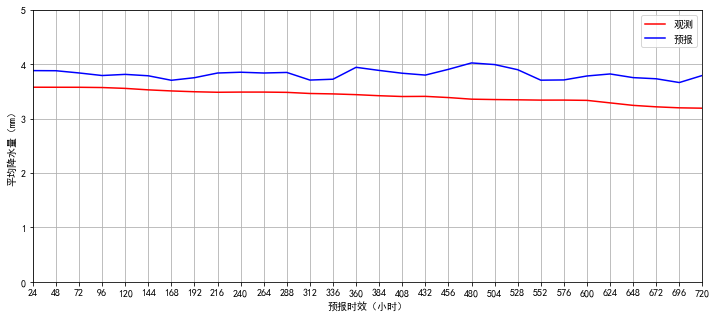

In [7]:
fig = plt.figure(figsize=(12,5))
plt.plot(ob_mean1[0],'r',label = "观测")
plt.plot(fo_mean1[0],'b',label = "预报")
plt.legend()
plt.ylabel("平均降水量（mm）")
plt.xlabel("预报时效（小时）")
xticks = np.array(ob_mean1[1]).squeeze()
plt.xticks(np.arange(len(ob_mean1[1])),xticks)
plt.grid()
plt.xlim(0,len(ob_mean1[1])-1)
plt.ylim(0,5)

In [8]:
#绘制不同时效不同等级的Bias
bias1 = nvp.score(sta_all,nvm.bias,group_by = "dtime",para1 = [0.1,10,25,50])

(0, 1.5)

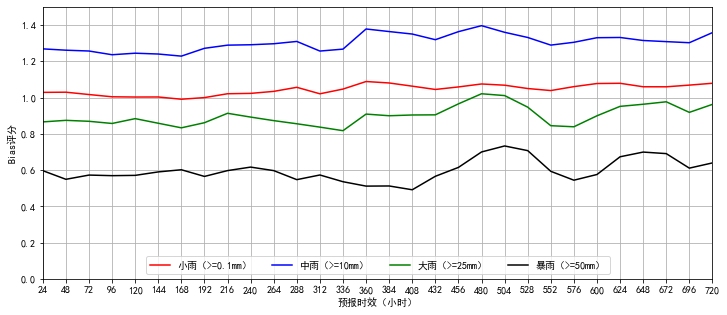

In [9]:
fig = plt.figure(figsize=(12,5))
plt.plot(bias1[0][:,0],'r',label = "小雨（>=0.1mm）")
plt.plot(bias1[0][:,1],'b',label = "中雨（>=10mm）")
plt.plot(bias1[0][:,2],'g',label = "大雨（>=25mm）")
plt.plot(bias1[0][:,3],'k',label = "暴雨（>=50mm）")
plt.legend(ncol = 4,loc = "lower center")
plt.ylabel("Bias评分")
plt.xlabel("预报时效（小时）")
xticks = np.array(bias1[1]).squeeze()
plt.xticks(np.arange(len(bias1[1])),xticks)
plt.grid()
plt.xlim(0,len(bias1[1])-1)
plt.ylim(0,1.5)

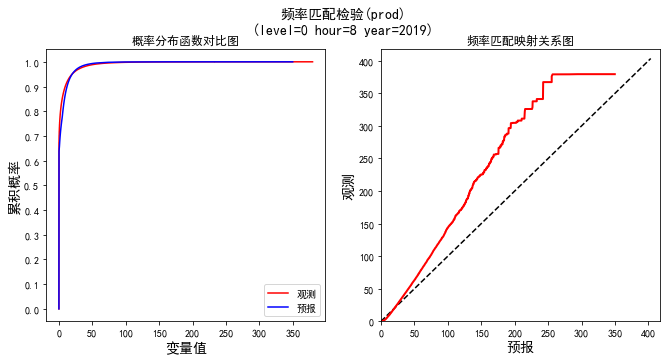

22.47935438156128


In [114]:
#绘制频率匹配曲线
begin = time.time()
nvp.plot(sta_all,nvm.pdf_plot)
print(time.time() - begin)

In [115]:
sta_part = nvb.in_dtime_list(sta_all,[720])

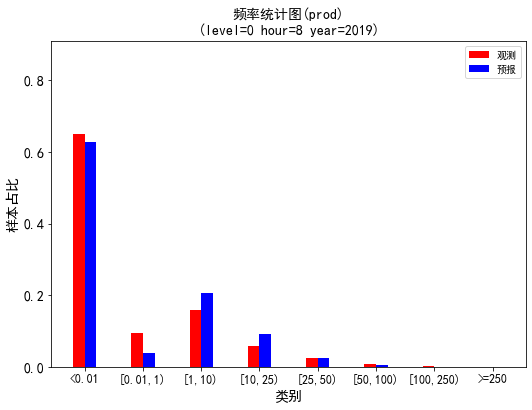

In [122]:
#绘制频率分布柱状图
nvp.plot(sta_all,nvm.multi_category.plot.frequency_histogram,para1 = [0.01,1,10,25,50,100,250])

In [140]:
ob_mean2 = nvp.score(sta_all,nvm.ob_mean,group_by ="id")
fo_mean2 = nvp.score(sta_all,nvm.fo_mean,group_by = "id")

In [138]:
dat = np.zeros((len(ob_mean2[1]),2))
dat[:,1] = ob_mean2[0][:]
dat[:,0] = np.array(ob_mean2[1])[:,0]
ob_mean2_sta = pd.DataFrame(dat,columns = ["id","ob_mean"])
ob_mean2_sta = pd.merge(station, ob_mean2_sta, on='id', how='inner')
ob_mean2_sta.drop(["data0"],axis = 1,inplace = True)

In [141]:
dat = np.zeros((len(fo_mean2[1]),2))
dat[:,1] = fo_mean2[0][:]
dat[:,0] = np.array(fo_mean2[1])[:,0]
fo_mean2_sta = pd.DataFrame(dat,columns = ["id","fo_mean"])
fo_mean2_sta = pd.merge(station, fo_mean2_sta, on='id', how='inner')
fo_mean2_sta.drop(["data0"],axis = 1,inplace = True)

In [192]:
grid0 = nvb.grid([73,135,0.5],[18,54,0.5])
masker = nvb.read_griddata_from_micaps4(r"H:\task\develop\java\meteoshop\resource\中国陆地和岛屿.txt",grid0)
grid_ob_mean = nvb.interp_sg_idw(ob_mean2_sta,grid0,effectR = 1000,nearNum = 10)
grid_fo_mean = nvb.interp_sg_idw(fo_mean2_sta,grid0,effectR = 1000,nearNum = 10)

In [195]:
error = nvb.grid_data(grid0,(grid_fo_mean.values - grid_ob_mean.values) * masker.values)

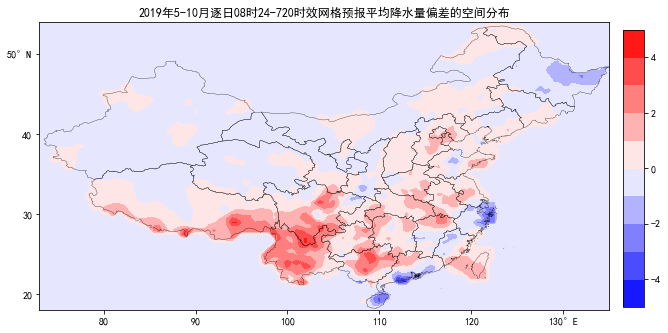

In [196]:
clevs,cmap = nvb.tool.color_tools.clev_cmap_rain_1h_error()
nvb.tool.plot_tools.contourf_2d_grid(error,title = "2019年5-10月逐日08时24-720时效网格预报平均降水量偏差的空间分布",cmap = "bwr")

In [222]:
bias_10mm = nvp.score(sta_all,nvm.bias,group_by = "id",para1 =[10])

In [236]:
bias_10mm_extend = bias_10mm[0]
dat = np.zeros((len(bias_10mm[1]),2))
dat[:,1] =bias_10mm_extend
dat[:,0] = np.array(bias_10mm[1])[:,0]
bias_10mm_sta = pd.DataFrame(dat,columns = ["id","ob_mean"])
bias_10mm_sta = pd.merge(station, bias_10mm_sta, on='id', how='inner')
bias_10mm_sta.drop(["data0"],axis = 1,inplace = True)
bias_10mm_sta = nvb.not_IV(bias_10mm_sta)

In [237]:
grid_bias_10mm =  nvb.interp_sg_idw(bias_10mm_sta,grid0,effectR = 1000,nearNum = 100)

In [295]:
vmax = math.ceil(np.max(grid_bias_10mm))
clevs,cmap = nvb.tool.color_tools.clev_cmap_bias_1(vmax)

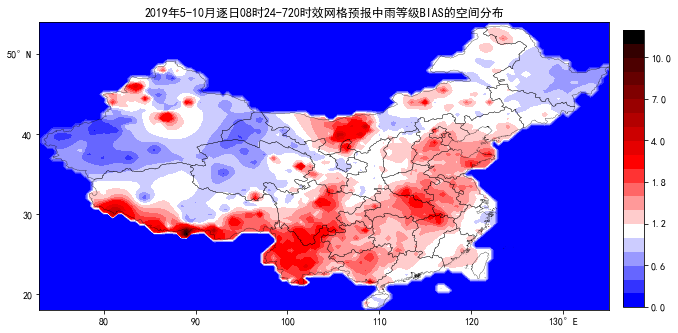

In [296]:
grid_bias_10mm.values *= masker.values
nvb.tool.plot_tools.contourf_2d_grid(grid_bias_10mm,title = "2019年5-10月逐日08时24-720时效网格预报中雨等级BIAS的空间分布",clevs = clevs,cmap = cmap)

In [323]:
bias_10_month = nvp.score(sta_all,nvm.bias,group_by = "month",para1 = [0,1,10,25,50,100])

In [324]:
bias_10_month

(array([[1.        , 1.49874831, 1.39108052, 1.04798289, 0.6386478 ,
         0.11111111],
        [1.        , 1.43565985, 1.27764027, 1.03067508, 0.77428043,
         0.40506519],
        [1.        , 1.23503596, 1.16859805, 0.68379065, 0.48494467,
         0.37547062],
        [1.        , 1.34725583, 1.36922719, 0.79297539, 0.46699637,
         0.30323054],
        [1.        , 1.15436815, 1.37496441, 0.93276343, 0.45376408,
         0.22884013],
        [1.        , 0.91779825, 1.41719616, 1.38435258, 0.8714402 ,
         0.62251656]]), [[5], [6], [7], [8], [9], [10]])

In [325]:
x = np.array(bias_10_month[1]).squeeze()
result = bias_10_month[0]

(4.5, 10.5)

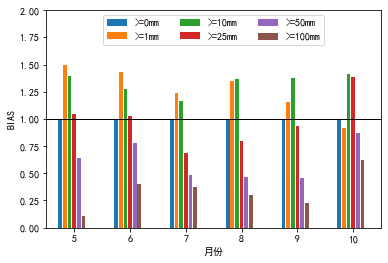

In [327]:
grade_list =  [0,1,10,25,50,100]
for i in range(len(grade_list)):
    x1 = x - (x.size/2 - i) * (0.5/len(grade_list)) + 0.0
    plt.bar(x1,result[:,i],width = 0.4/len(grade_list),label =">=" + str(grade_list[i])+"mm")
#plt.xticks(x,x)
plt.ylim(0,2)
plt.xlabel("月份")
plt.ylabel("BIAS")
plt.legend(ncol = 3,loc = "upper center")
plt.hlines(1.0,4.5,11,colors = "k",linewidth = 1)
plt.xlim(4.5,10.5)

In [356]:
grade_list = [0.1,10,25,50]
ts = nvp.score(sta_all,nvm.ets,group_by = "dtime",para1 = grade_list)

(-0.0, 0.5)

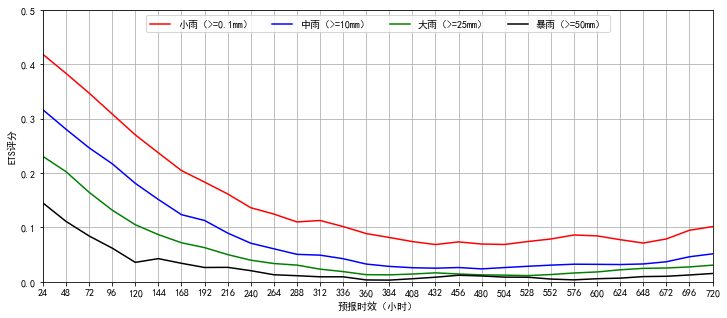

In [358]:
fig = plt.figure(figsize=(12,5))
plt.plot(ts[0][:,0],'r',label = "小雨（>=0.1mm）")
plt.plot(ts[0][:,1],'b',label = "中雨（>=10mm）")
plt.plot(ts[0][:,2],'g',label = "大雨（>=25mm）")
plt.plot(ts[0][:,3],'k',label = "暴雨（>=50mm）")
plt.legend(ncol = 4,loc = "upper center")
plt.ylabel("ETS评分")
plt.xlabel("预报时效（小时）")
xticks = np.array(ts[1]).squeeze()
plt.xticks(np.arange(len(bias1[1])),xticks)
plt.grid()
plt.xlim(0,len(bias1[1])-1)
plt.ylim(-0.0,0.5)

In [331]:
sta_part = nvb.in_dayofyear_list(sta_all,[180])

In [400]:
begin = time.time()
fss_t1 = nvp.score(sta_all,nvm.FSS_time,para1 = [0.1],para2 = 15)

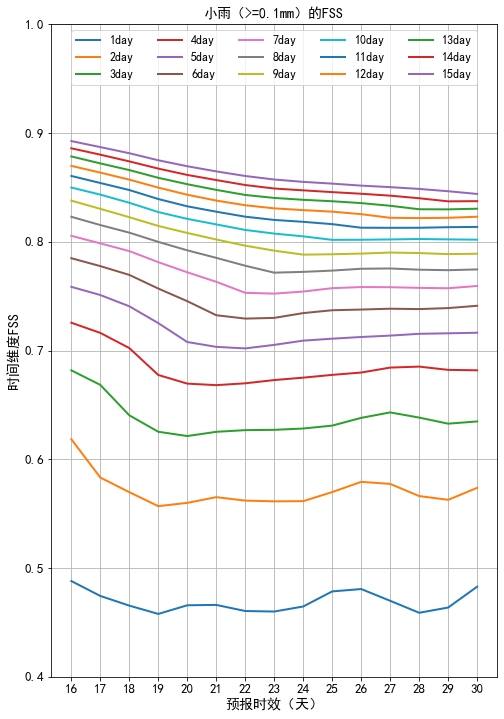

In [403]:
fig = plt.figure(figsize= (8,12))
for i in range(15):
    plt.plot(fss_t1[0][i,:],lineWidth = 2,label = str(i+1)+"day")
plt.ylim(0.4,1.0)
x = np.arange(15)
xticsk = np.arange(16,31)
plt.xticks(x,xticsk,fontsize = 13)
plt.yticks(np.arange(0.4,1.01,0.1),fontsize = 13)
plt.legend(ncol =5,loc = "upper center",fontsize = 12)
plt.xlabel("预报时效（天）",fontsize = 14)
plt.ylabel("时间维度FSS",fontsize = 14)
plt.title("小雨（>=0.1mm）的FSS",fontsize = 14)
plt.grid()

In [395]:
begin = time.time()
fss_t = nvp.score(sta_all,nvm.FSS_time,para1 = [10],para2 = 15)

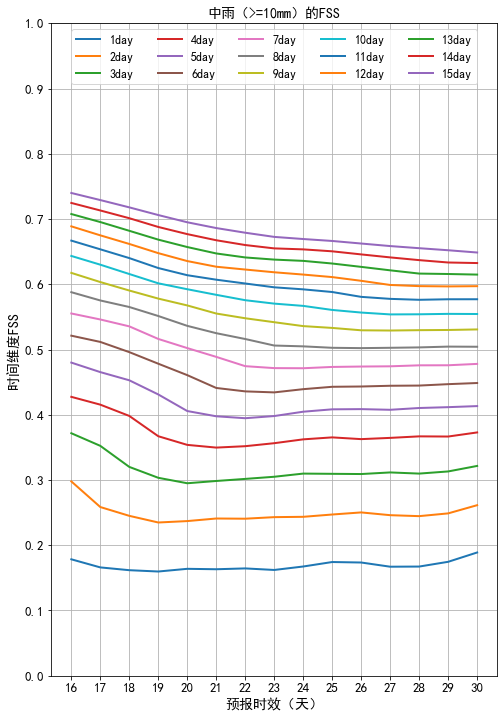

In [404]:
fig = plt.figure(figsize= (8,12))
for i in range(15):
    plt.plot(fss_t[0][i,:],lineWidth = 2,label = str(i+1)+"day")
plt.ylim(0.0,1)
x = np.arange(15)
xticsk = np.arange(16,31)
plt.xticks(x,xticsk,fontsize = 13)
plt.yticks(np.arange(0.0,1.01,0.1),fontsize = 13)
plt.legend(ncol =5,loc = "upper center",fontsize = 12)
plt.xlabel("预报时效（天）",fontsize = 14)
plt.ylabel("时间维度FSS",fontsize = 14)
plt.title("中雨（>=10mm）的FSS",fontsize = 14)
plt.grid()

In [418]:
import nmc_verification
def get_time_str_one_by_one_n(time1,time0 = None):
    if time0 is None:
        time2 = nmc_verification.nmc_vf_base.tool.time_tools.all_type_time_to_datetime(time1)
        if time2.hour == 0 and time2.minute == 0:

            time_str = time2.strftime('%d{d}\n%Y{y}%m{m}').format(y='年', m='月', d='日')
        elif time2.minute == 0:
            time_str = time2.strftime('%H{h}\n%Y{y}%m{m}%d{d}').format(y='年', m='月', d='日',h='时')
        else:
            time_str = time2.strftime('%M{mi}\n%Y{y}%m{m}%d{d}%H{h}').format(y='年', m='月', d='日',h='时',mi = '分')
    else:
        time00 = nmc_verification.nmc_vf_base.tool.time_tools.all_type_time_to_datetime(time0)
        time2 = nmc_verification.nmc_vf_base.tool.time_tools.all_type_time_to_datetime(time1)
        if time2.year != time00.year:
            if time2.hour == 0 and time2.minute == 0:
                time_str = time1.strftime('%d{d}\%Y{y}%m{m}').format(y='年', m='月', d='日')
            elif time1.minute == 0:
                time_str = time1.strftime('%H{h}\n%Y{y}%m{m}%d{d}').format(y='年', m='月', d='日',h='时')
            else:
                time_str = time1.strftime('%M{mi}\%Y{y}%m{m}%d{d}%H{h}').format(y='年', m='月', d='日',h='时',mi = '分')
        elif time2.month != time00.month:
            if time2.hour == 0 and time2.minute == 0:
                time_str = time2.strftime('%d{d}\n%m{m}').format(m='月', d='日')
            elif time2.minute == 0:
                time_str = time2.strftime('%H{h}\n%m{m}%d{d}').format(m='月', d='日',h='时')
            else:
                time_str = time2.strftime('%M{mi}\n%m{m}%d{d}%H{h}').format(m='月', d='日',h='时',mi = '分')
        elif time2.day != time00.day:
            if time2.hour == 0 and time2.minute == 0:
                time_str = time2.strftime('%d{d}').format(d='日')
            elif time2.minute == 0:
                time_str = time2.strftime('%H{h}\n%d{d}').format(d='日',h='时')
            else:
                time_str = time2.strftime('%M{mi}\n%d{d}%H{h}').format(d='日',h='时',mi = '分')
        elif time2.hour != time00.hour:
            if time2.minute == 0:
                time_str = time2.strftime('%H{h}').format(h='时')
            else:
                time_str = time2.strftime('%M{mi}\n%H{h}').format(h='时',mi = '分')
        else:
            time_str = time2.strftime("%M分")
    return time_str

08时
14时
20时
02时
02日
08时
14时
20时
02时
03日
08时
14时
20时
02时
04日
08时
14时
20时
02时
05日
08时
14时
20时


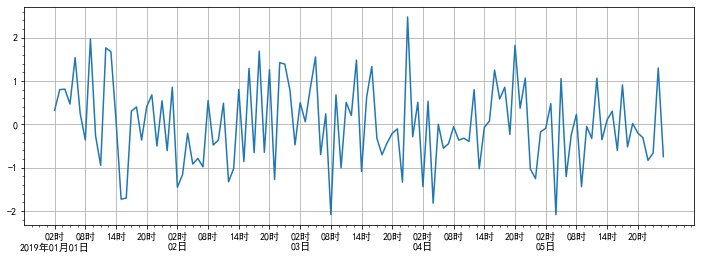

In [433]:
time0 = datetime.datetime(2019,1,1,2,0)
str_list = [get_time_str_one_by_one_n(time0)]
x = [0]
dat = np.random.randn(120)
for i in range(6,120,6):
    x.append(i)
    time1 = time0 + datetime.timedelta(hours = i-6)
    time2 = time0 + datetime.timedelta(hours = i )
    str1 = get_time_str_one_by_one_n(time2,time1)
    print(str1)
    str_list.append(str1)

fig = plt.figure(figsize = (12,4))
plt.plot(dat)
plt.xticks(x,str_list)
plt.minorticks_on()
plt.grid()

In [19]:
nvp.score(ob_sta_all,nvm.s,para1=[1,5])

(array([0.23831586, 0.13848253]), None)

In [21]:
ob_list = []
ob_list.append(nvb.by_loc_dict(ob_sta_all,{"lon":[99,110],"lat":[25,33]}))
ob_list.append(nvb.by_loc_dict(ob_sta_all,{"lon":[105,115],"lat":[18,28]}))
ob_list.append(nvb.by_loc_dict(ob_sta_all,{"lon":[105,115],"lat":[18,28]}))

In [25]:
region_list = ["西南","华南","江南"]
para1 = [1]
nvp.score(ob_sta_all,nvm.s,group_by = "ob_hour",para1=para1)

1


(array(0.23831586), [[8]])